In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
# Define a function to load CIFAR-10 dataset
def load_CIFAR10(cifar10_dir):
    X_batches = []
    y_batches = []
    for i in range(1, 6):
        with open(cifar10_dir + '/data_batch_' + str(i), 'rb') as f:
            data_dict = pickle.load(f, encoding='bytes')
            X_batches.append(data_dict[b'data'])
            y_batches.append(data_dict[b'labels'])
    X_train = np.concatenate(X_batches)
    y_train = np.concatenate(y_batches)
    return X_train, y_train

# Load CIFAR-10 training data
cifar10_dir = r'F:\Study\11th Semester\Machine Learning\KNN-HW\cifar-10-python\cifar-10-batches-py'
X_train, y_train = load_CIFAR10(cifar10_dir)

# Subsample the training data
num_training = 10000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (10000, 3072)
Shape of y_train: (10000,)


In [4]:
# Define a function to load CIFAR-10 test data
def load_CIFAR10_test(test_file):
    with open(test_file, 'rb') as f:
        test_dict = pickle.load(f, encoding='bytes')
        X_test = test_dict[b'data']
        y_test = np.array(test_dict[b'labels'])
    return X_test, y_test

# Load CIFAR-10 test data
test_file = r'F:\Study\11th Semester\Machine Learning\KNN-HW\cifar-10-python\cifar-10-batches-py\test_batch'
X_test, y_test = load_CIFAR10_test(test_file)

# Subsample the test data
num_test = 1000
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_test: (1000, 3072)
Shape of y_test: (1000,)


In [2]:

class KNearestNeighbor(object):
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=5, num_loops=0, distance_metric='euclidean'):
        if num_loops == 0:
            if distance_metric == 'euclidean':
                dists = self.compute_distances(X, metric='euclidean')
            elif distance_metric == 'manhattan':
                dists = self.compute_distances(X, metric='manhattan')
            else:
                raise ValueError('Invalid distance metric')
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)
        return self.predict_labels(dists, k=k)

    def compute_distances(self, X, metric='euclidean'):
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))

        if metric == 'euclidean':
            for i in range(num_test):
                dists[i] = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
        elif metric == 'manhattan':
            for i in range(num_test):
                dists[i] = np.sum(np.abs(self.X_train - X[i]), axis=1)
        else:
            raise ValueError('Invalid distance metric')

        return dists

    def predict_labels(self, dists, k=1):
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            closest_y = self.y_train[np.argsort(dists[i])[:k]]
            y_pred[i] = np.argmax(np.bincount(closest_y))

        return y_pred


In [5]:
# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)  # Reshape to (num_samples, channels, height, width)
X_train = X_train.transpose(0, 2, 3, 1)  # Transpose to (num_samples, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to (num_samples, total_pixels)

X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)  # Reshape to (num_samples, channels, height, width)
X_test = X_test.transpose(0, 2, 3, 1)  # Transpose to (num_samples, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten to (num_samples, total_pixels)

# Normalize the data (assuming pixel values are between 0 and 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

print("Shape of X_train after preprocessing:", X_train.shape)
print("Shape of X_test after preprocessing:", X_test.shape)

Shape of X_train after preprocessing: (10000, 3072)
Shape of X_test after preprocessing: (1000, 3072)


In [6]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

    #Visualize the data if you want
#visualize_data(X_train, y_train)

Training data shape:  (10000, 3072)
Training labels shape:  (10000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [8]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# Reshape and normalize the data
X_train = X_train.reshape(X_train.shape[0], 3, 32, 32)  # Reshape to (num_samples, channels, height, width)
X_train = X_train.transpose(0, 2, 3, 1)  # Transpose to (num_samples, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten to (num_samples, total_pixels)
X_train = X_train / 255.0  # Normalize the data

X_test = X_test.reshape(X_test.shape[0], 3, 32, 32)  # Reshape to (num_samples, channels, height, width)
X_test = X_test.transpose(0, 2, 3, 1)  # Transpose to (num_samples, height, width, channels)
X_test = X_test.reshape(X_test.shape[0], -1)  # Flatten to (num_samples, total_pixels)
X_test = X_test / 255.0  # Normalize the data

# Initialize classifier
classifier = KNearestNeighbor()

# Subsample the training and test data
num_training = 5000
num_test = 500
X_train_subsample = X_train[:num_training]
y_train_subsample = y_train[:num_training]
X_test_subsample = X_test[:num_test]
y_test_subsample = y_test[:num_test]

# Perform 5-fold cross validation to find optimal k from choices below
num_folds = 5
k_choices = [1, 3, 5, 8, 10]
k_to_accuracies = {}  # dictionary to hold validation accuracies for each k 

for k in k_choices:
    k_to_accuracies[k] = []  # each key, k, should hold its list of 3 validation accuracies

    # For each fold of cross-validation
    for fold_idx in range(num_folds):
        # Split data into training and validation folds
        X_train_fold, X_val_fold = np.split(X_train_subsample, [int(0.8 * len(X_train_subsample))])
        y_train_fold, y_val_fold = np.split(y_train_subsample, [int(0.8 * len(y_train_subsample))])

        # Train the classifier
        classifier.train(X_train_fold, y_train_fold)

        # Compute distances and predict labels for validation fold
        dists = classifier.compute_distances(X_val_fold)
        y_val_pred = classifier.predict_labels(dists, k=k)

        # Calculate accuracy
        num_correct = np.sum(y_val_pred == y_val_fold)
        accuracy = float(num_correct) / len(y_val_fold)

        # Append accuracy to the list for this k value
        k_to_accuracies[k].append(accuracy)

# Print cross-validation accuracies for varying values of k
print("Printing our 5-fold accuracies for varying values of k:")
print()
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

# Choose best value of k based on cross-validation results
best_k = max(k_to_accuracies, key=lambda k: np.mean(k_to_accuracies[k]))

# Initialize classifier and predict labels of test data using best value of k
classifier.train(X_train_subsample, y_train_subsample)
dists = classifier.compute_distances(X_test_subsample)
y_test_pred = classifier.predict_labels(dists, k=best_k)

# Computing and displaying the accuracy for best k found during cross-validation
num_correct = np.sum(y_test_pred == y_test_subsample)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct on test data => accuracy: %f' % (num_correct, num_test, accuracy))
# Accuracy above should be ~ 57-58%


Printing our 5-fold accuracies for varying values of k:

k = 1, accuracy = 0.266000
k = 1, accuracy = 0.266000
k = 1, accuracy = 0.266000
k = 1, accuracy = 0.266000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 3, accuracy = 0.254000
k = 3, accuracy = 0.254000
k = 3, accuracy = 0.254000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.280000
k = 10, accuracy = 0.280000
k = 10, accuracy = 0.280000
k = 10, accuracy = 0.280000
k = 10, accuracy = 0.280000
Got 139 / 500 correct on test data => accuracy: 0.278000


Precision: 0.36917738420478263
Recall: 0.269143088334488
F1 Score: 0.23974923542884144


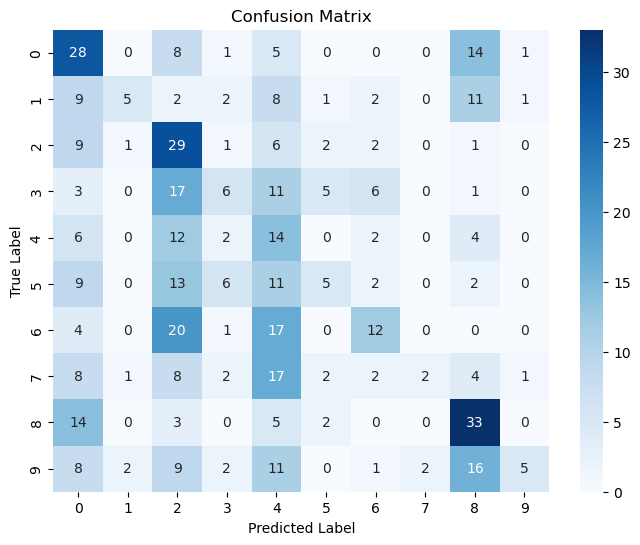

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate additional evaluation metrics: precision, recall, and F1-score
precision = precision_score(y_test_subsample, y_test_pred, average='macro')
recall = recall_score(y_test_subsample, y_test_pred, average='macro')
f1 = f1_score(y_test_subsample, y_test_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute confusion matrix
cm = confusion_matrix(y_test_subsample, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\hrich\AppData\Local\Temp\ipykernel_3844\2217036482.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std, fmt='-o', color='b', ecolor='r', linestyle='-', marker='o')
C:\Users\hrich\AppData\Local\Temp\ipykernel_3844\2217036482.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std, fmt='-o', color='b', ecolor='r', linestyle='-', marker='o')


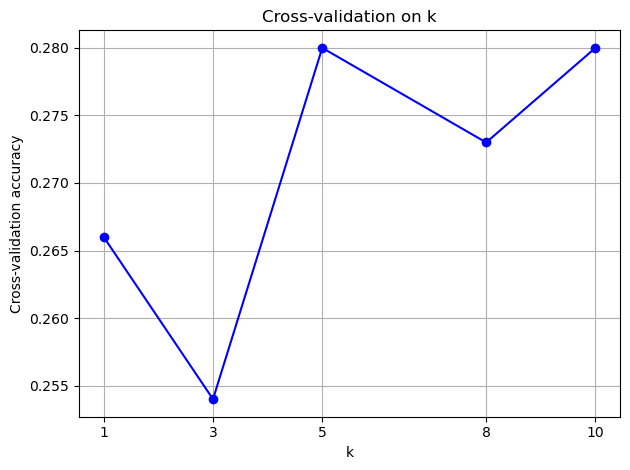

In [10]:
# Plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std, fmt='-o', color='b', ecolor='r', linestyle='-', marker='o')
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.xticks(k_choices)
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
# Initialize classifier
classifier = KNearestNeighbor()

# Use the KNearestNeighbor classifier to do as follows:
# 1) Initialize classifier with training data
classifier.train(X_train, y_train)

# 2) Use classifier to predict labels of each test example in X_test using Euclidean distance and k=5 
y_test_pred = classifier.predict(X_test, k=5, distance_metric='euclidean')

# Calculate accuracy for Euclidean distance
num_correct = np.sum(y_test_pred == y_test) 
accuracy = float(num_correct) / len(y_test)
print('Got %d / %d correct with k=5 for Euclidean Distance=> accuracy: %f' % (num_correct, len(y_test), accuracy))

# 3) Use classifier to predict labels of each test example in X_test using Manhattan distance and k=5 
y_test_pred_manhattan = classifier.predict(X_test, k=5, distance_metric='manhattan')

# Calculate accuracy for Manhattan distance
num_correct_manhattan = np.sum(y_test_pred_manhattan == y_test) 
accuracy_manhattan = float(num_correct_manhattan) / len(y_test)
print('Got %d / %d correct with k=5 and Manhattan distance => accuracy: %f' % (num_correct_manhattan, len(y_test), accuracy_manhattan))


Got 296 / 1000 correct with k=5 for Euclidean Distance=> accuracy: 0.296000
Got 310 / 1000 correct with k=5 and Manhattan distance => accuracy: 0.310000
